# Decomposition of P&L of European Options
Options is one of the most versatile instruments in the trading world. When you trade options, your profit or loss (P&L) depends on various factors. These factors are often measured using something called “Greeks,” which are sensitivity measures indicating how your option’s value changes in response to different factors like price movements, time passing, or changes in volatility. Think of it as breaking down your overall profit or loss into different parts, each representing the impact of a specific factor. This helps you understand where your gains or losses are coming from.

1. **Delta**: Delta measures how much the option price changes for a given change in the underlying stock price. So, part of your P&L comes from changes in the stock price, and delta tells you how much.

2. **Theta**: Theta measures how much the option price changes as time passes. Options lose value over time due to expiration, and theta tells you how much of your P&L is due to this time decay.

3. **Vega**: Vega measures how much the option price changes with changes in volatility. If volatility increases, option prices tend to rise, and vice versa. So, vega tells you how much of your P&L is due to changes in volatility.

4. **Gamma**: Gamma measures how fast delta changes with changes in the stock price. It's like the speed of delta. So, gamma tells you how much your delta (and therefore your P&L from price movements) changes for a given change in the stock price.

5. **Volga**: Volga measures how much the vega (sensitivity to volatility) changes with changes in volatility. It's like the gamma of vega. So, volga tells you how much your vega (and therefore your P&L from changes in volatility) changes with volatility changes.

6. **Vanna**: Vanna measures how much the delta changes with changes in volatility. It's like the combination of gamma and vega. So, vanna tells you how much your delta (and therefore your P&L from price movements) changes with changes in volatility.

7. **Unexplained**: Sometimes, there may be changes in your P&L that can't be completely explained by these factors. This is the "unexplained" part, which could be due to various reasons like market inefficiencies or factors not captured by the Greeks.

## Step 1: Import Libraries

First, let's import the necessary libraries. We'll mainly use NumPy and Matplotlib for mathematical calculations and plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Step 2: Define Black-Scholes Model and Greeks Calculation

We’ll define a class to represent options based on the Black-Scholes model. This class will include methods to calculate the Greeks: Delta, Gamma, Theta, Vega, Volga, and Vanna.

In [2]:
class BlackScholesOption:
    def __init__(self, S, K, r, T, sigma):
        self.S = S  # Current stock price
        self.K = K  # Strike price
        self.r = r  # Risk-free rate
        self.T = T  # Time to maturity
        self.sigma = sigma  # Volatility
    
    # Delta: Δ = ∂S/∂V​
    def calculate_delta(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        delta = np.exp(-self.r * self.T) * norm.cdf(d1)
        return delta

    # Gamma: Γ = ∂S²/∂²V​
    def calculate_gamma(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        gamma = np.exp(-self.r * self.T) * norm.pdf(d1) / (self.S * self.sigma * np.sqrt(self.T))
        return gamma

    # Theta: Θ = ∂t/∂V​
    def calculate_theta(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        theta = (-self.S * norm.pdf(d1) * self.sigma) / (2 * np.sqrt(self.T)) - self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        return theta

    # Vega: ν = ∂σ/∂V​
    def calculate_vega(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        vega = self.S * np.sqrt(self.T) * norm.pdf(d1)
        return vega

    # Volga = ∂σ/∂ν​
    def calculate_volga(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        volga = self.S * np.sqrt(self.T) * d1 * norm.pdf(d1)
        return volga

    # Vanna = ∂²V/∂S∂σ​
    def calculate_vanna(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        vanna = -norm.pdf(d1) * d1 / self.sigma
        return vanna
    
    # Calculate option price using Black-Scholes formula
    def calculate_price(self):
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        call_price = self.S * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        return call_price

    # Calculate P&L based on changes in parameters
    def calculate_PnL(self, S1, sigma1, T1):
        # Calculate option price for initial parameters
        price_initial = self.calculate_price()

        # Create option object with updated parameters
        option_updated = BlackScholesOption(S1, self.K, self.r, T1, sigma1)

        # Calculate option price for updated parameters
        price_updated = option_updated.calculate_price()

        # Calculate profit and loss
        PnL = price_updated - price_initial
        return PnL

## Step 3: Parameters and Market Changes

Set the parameters for option pricing and simulate changes in the market between time $t$ and $t+dt$. Update the change in stock price, volatility, and maturity.

In [3]:
# Define initial parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
T = 1     # Time to maturity
sigma = 0.2  # Volatility

# Define time step
dt = 1 / 365 # One day

# Simulate changes in the market
S1 = S0 + np.random.normal(0, 1)  # New stock price
sigma1 = sigma + np.random.normal(0, 0.01)  # New volatility
T1 = T - dt  # New maturity

## Step 4: Calculate Profit and Loss (P&L)

Calculate the P&L between time $t$ and $t+dt$ using the updated parameters and market changes.

In [4]:
# Initialize option object
option = BlackScholesOption(S0, K, r, T, sigma)
# Calculate P&L
PnL = option.calculate_PnL(S1, sigma1, T1)
print(PnL)

0.11269904144089793


## Step 5: P&L Attribution and Plotting
Decompose the P&L into contributions from different Greeks and plot it with a bar chart. The equations for each Greek:

1. **Delta**: $\Delta = \frac{{\partial V}}{{\partial S}}$
2. **Gamma**: $\Gamma = \frac{{\partial^2 V}}{{\partial S^2}}$
3. **Theta**: $\Theta = \frac{{\partial V}}{{\partial t}}$
4. **Vega**: $\nu = \frac{{\partial V}}{{\partial \sigma}}$
5. **Volga**: $\text{Volga} = \frac{{\partial \nu}}{{\partial \sigma}}$
6. **Vanna**: $\text{Vanna} = \frac{{\partial^2 V}}{{\partial S \partial \sigma}}$

And their profit and loss (P&L) contributions:

1. **Delta P&L:** $\text{Delta P\&L} = \Delta \times (S_1 - S_0)$
2. **Gamma P&L:** $\text{Gamma P\&L} = 0.5 \times \Gamma \times (S_1 - S_0)^2$
3. **Theta P&L:** $\text{Theta P\&L} = \Theta \times \Delta t$
4. **Vega P&L:** $\text{Vega P\&L} = \nu \times (\sigma_1 - \sigma_0)$
5. **Volga P&L:**$\text{Volga P\&L} = 0.5 \times \text{Volga} \times (\sigma_1 - \sigma_0)^2$
6. **Vanna P&L:** $\text{Vanna P\&L} = Vanna \times (S_1 - S_0) \times (\sigma_1 - \sigma_0)$

Now we have all the materials for our code:

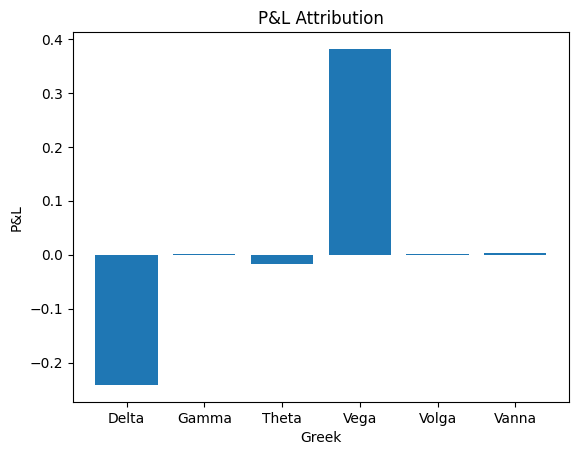

In [5]:
# Calculate Greeks
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()
volga = option.calculate_volga()
vanna = option.calculate_vanna()

# Decompose P&L
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2
theta_PnL = theta * dt
vega_PnL = vega * (sigma1 - sigma)
volga_PnL = 0.5 * volga * (sigma1 - sigma)**2
vanna_PnL = vanna * (S1 - S0) * (sigma1 - sigma)

# Calculate total P&L
total_PnL = PnL

# Plot P&L attribution
labels = ['Delta', 'Gamma', 'Theta', 'Vega', 'Volga', 'Vanna']
values = [delta_PnL, gamma_PnL, theta_PnL, vega_PnL, volga_PnL, vanna_PnL]

plt.bar(labels, values)
plt.xlabel('Greek')
plt.ylabel('P&L')
plt.title('P&L Attribution')
plt.show()

## Case study 1: Earnings Announcement
Here are some situations where investigating the effects of P&L on Greeks can be insightful. Prior to an earnings announcement, options prices may exhibit heightened volatility. Analyzing the impact of Vega on P&L can reveal how changes in implied volatility affect option values. Additionally, examining Delta and Gamma can help assess the sensitivity of option positions to movements in the underlying stock price during and after the earnings release.

Suppose we have a call option on a tech stock with an upcoming earnings announcement. The option has the following parameters:

- Initial stock price (S0) = $100
- Strike price (K) = $110
- Risk-free rate (r) = 0.05
- Time to maturity (T) = 0.5 years
- Initial volatility (sigma) = 0.2

Possible Changes:

- Stock Price (S): The stock price may experience significant movements leading up to and following the earnings announcement.
- Volatility (sigma): Implied volatility tends to increase as the earnings announcement approaches due to uncertainty in the market.
- Time to Maturity (T): The remaining time until expiration decreases as the earnings announcement date approaches.

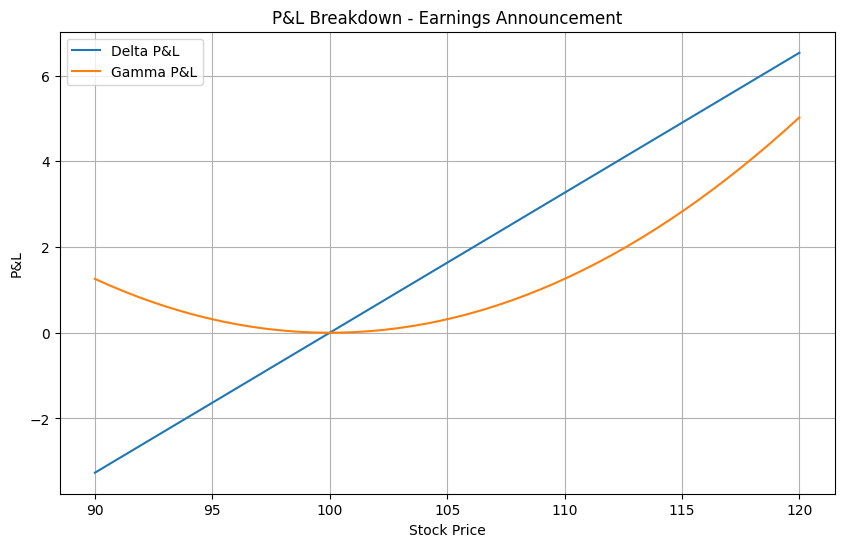

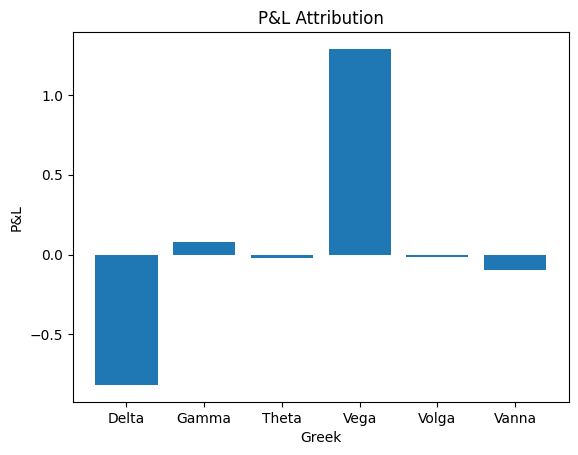

In [6]:
# Define initial parameters
S0 = 100  # Initial stock price
K = 110   # Strike price
r = 0.05  # Risk-free rate
T = 0.5   # Time to maturity
sigma = 0.2  # Initial volatility

# Initialize option object and calculate Greeks
option = BlackScholesOption(S0, K, r, T, sigma)
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()

# Simulate changes in market leading up to earnings announcement
S1 = np.linspace(90, 120, 50)  # Range of possible stock prices
sigma1 = 0.25  # Increased volatility before earnings
T1 = 0.25  # Decreased time to maturity before earnings

# Calculate P&L contributions
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2

# Plot P&L breakdown
plt.figure(figsize=(10, 6))
plt.plot(S1, delta_PnL, label='Delta P&L')
plt.plot(S1, gamma_PnL, label='Gamma P&L')
plt.xlabel('Stock Price')
plt.ylabel('P&L')
plt.title('P&L Breakdown - Earnings Announcement')
plt.legend()
plt.grid(True)
plt.show()

S1 = S0 + np.random.normal(0, 10)  # New supposed stock price
# Calculate Greeks
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()
volga = option.calculate_volga()
vanna = option.calculate_vanna()

# Decompose P&L
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2
theta_PnL = theta * dt
vega_PnL = vega * (sigma1 - sigma)
volga_PnL = 0.5 * volga * (sigma1 - sigma)**2
vanna_PnL = vanna * (S1 - S0) * (sigma1 - sigma)

# Calculate total P&L
total_PnL = PnL

# Plot P&L attribution
labels = ['Delta', 'Gamma', 'Theta', 'Vega', 'Volga', 'Vanna']
values = [delta_PnL, gamma_PnL, theta_PnL, vega_PnL, volga_PnL, vanna_PnL]

plt.bar(labels, values)
plt.xlabel('Greek')
plt.ylabel('P&L')
plt.title('P&L Attribution')
plt.show()

## Case Study 2: Market Volatility Spike
During periods of market turmoil or sudden volatility spikes, the effects of Gamma and Vega become more pronounced. Understanding how Gamma influences Delta and P&L can be crucial in managing risk during rapid market movements. Moreover, observing changes in Vega P&L can highlight the impact of volatility shocks on option positions.

Possible Changes:

Volatility (sigma): A sudden increase in market volatility, such as during a market crash or geopolitical event.
Stock Price (S): The stock price may also experience significant movements during the volatility spike, but for simplicity, we’ll focus primarily on the volatility aspect.

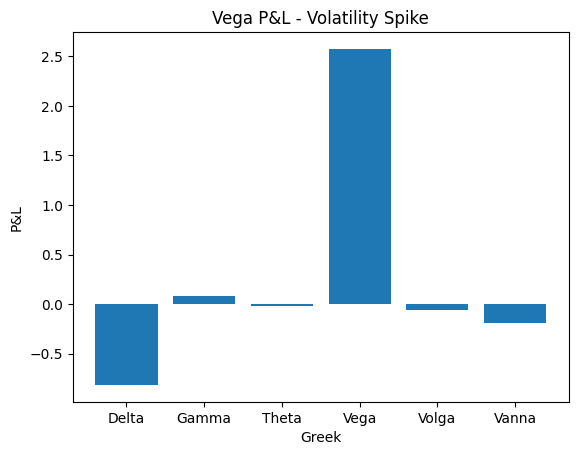

In [7]:
# Simulate changes in market conditions during volatility spike
sigma1 = 0.3  # Increased volatility during spike

# Calculate Greeks
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()
volga = option.calculate_volga()
vanna = option.calculate_vanna()

# Decompose P&L
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2
theta_PnL = theta * dt
vega_PnL = vega * (sigma1 - sigma)
volga_PnL = 0.5 * volga * (sigma1 - sigma)**2
vanna_PnL = vanna * (S1 - S0) * (sigma1 - sigma)

# Calculate total P&L
total_PnL = PnL

# Plot P&L attribution
labels = ['Delta', 'Gamma', 'Theta', 'Vega', 'Volga', 'Vanna']
values = [delta_PnL, gamma_PnL, theta_PnL, vega_PnL, volga_PnL, vanna_PnL]

plt.bar(labels, values)
plt.xlabel('Greek')
plt.ylabel('P&L')
plt.title('Vega P&L - Volatility Spike')
plt.show()

Case Study 3: Expiration Week
As options approach expiration, Theta accelerates the decay of option value. Investigating the contribution of Theta to P&L during expiration week can provide insights into the dynamics of time decay and help optimize strategies for minimizing losses due to Theta erosion. Additionally, analyzing Delta and Gamma in the context of expiration can reveal opportunities for delta-hedging or gamma-scalping strategies.

Possible Changes:

Time to Maturity (T): As expiration week approaches, the remaining time until expiration decreases.


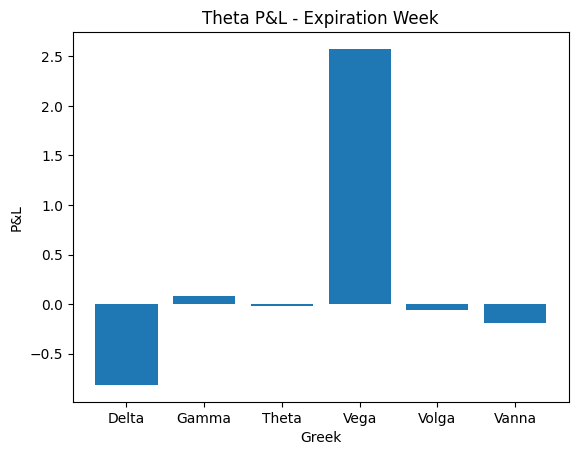

In [8]:
# Simulate changes in market conditions during expiration week
T1 = 0.1  # Decreased time to maturity during expiration week

# Calculate Greeks
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()
volga = option.calculate_volga()
vanna = option.calculate_vanna()

# Decompose P&L
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2
theta_PnL = theta * dt
vega_PnL = vega * (sigma1 - sigma)
volga_PnL = 0.5 * volga * (sigma1 - sigma)**2
vanna_PnL = vanna * (S1 - S0) * (sigma1 - sigma)

# Calculate total P&L
total_PnL = PnL

# Plot P&L attribution
labels = ['Delta', 'Gamma', 'Theta', 'Vega', 'Volga', 'Vanna']
values = [delta_PnL, gamma_PnL, theta_PnL, vega_PnL, volga_PnL, vanna_PnL]

plt.bar(labels, values)
plt.xlabel('Greek')
plt.ylabel('P&L')
plt.title('Theta P&L - Expiration Week')
plt.show()

## Case Study 4: Event-Driven Catalysts

Events such as mergers, acquisitions, or regulatory decisions can trigger significant movements in underlying asset prices. Examining the interplay between Delta, Vega, and Vanna during such events can offer valuable insights into managing option positions effectively. Understanding how changes in both stock price and volatility impact option values allows traders to adjust their strategies accordingly to capitalize on opportunities or mitigate risks.

Possible Changes:

- Stock Price (S): The announcement of a merger or acquisition can lead to significant movements in the stock price.
- Volatility (sigma): Market uncertainty may increase due to the event, leading to changes in implied volatility.

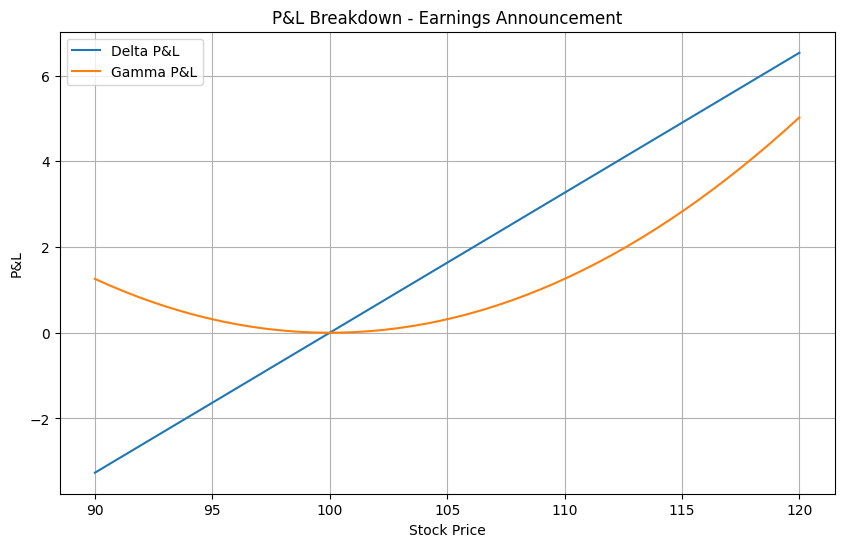

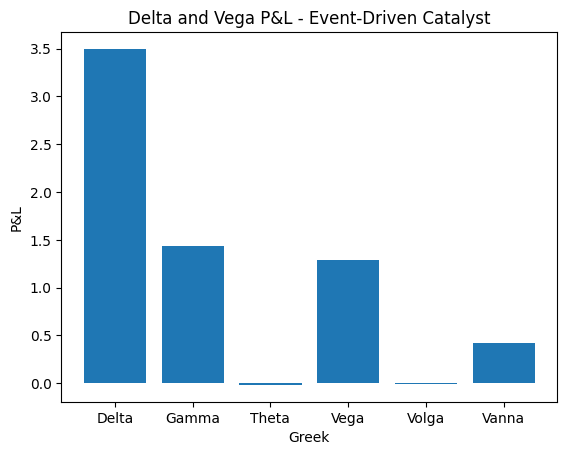

In [9]:
# Initialize option object and calculate Greeks
option = BlackScholesOption(S0, K, r, T, sigma)
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()

# Simulate changes in market leading up to earnings announcement
S1 = np.linspace(90, 120, 50)  # Range of possible stock prices
sigma1 = 0.25  # Increased volatility before earnings

# Calculate P&L contributions
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2

# Plot P&L breakdown
plt.figure(figsize=(10, 6))
plt.plot(S1, delta_PnL, label='Delta P&L')
plt.plot(S1, gamma_PnL, label='Gamma P&L')
plt.xlabel('Stock Price')
plt.ylabel('P&L')
plt.title('P&L Breakdown - Earnings Announcement')
plt.legend()
plt.grid(True)
plt.show()

S1 = S0 + np.random.normal(0, 10)  # New supposed stock price
# Calculate Greeks
delta = option.calculate_delta()
gamma = option.calculate_gamma()
theta = option.calculate_theta()
vega = option.calculate_vega()
volga = option.calculate_volga()
vanna = option.calculate_vanna()

# Decompose P&L
delta_PnL = delta * (S1 - S0)
gamma_PnL = 0.5 * gamma * (S1 - S0)**2
theta_PnL = theta * dt
vega_PnL = vega * (sigma1 - sigma)
volga_PnL = 0.5 * volga * (sigma1 - sigma)**2
vanna_PnL = vanna * (S1 - S0) * (sigma1 - sigma)

# Calculate total P&L
total_PnL = PnL

# Plot P&L attribution
labels = ['Delta', 'Gamma', 'Theta', 'Vega', 'Volga', 'Vanna']
values = [delta_PnL, gamma_PnL, theta_PnL, vega_PnL, volga_PnL, vanna_PnL]

plt.bar(labels, values)
plt.xlabel('Greek')
plt.ylabel('P&L')
plt.title('Delta and Vega P&L - Event-Driven Catalyst')
plt.show()

## Conclusion

Understanding the decomposition of P&L into various Greeks provides valuable insights into the risk profile and potential sources of profit or loss for options traders.

